# 04 - Exploratory data analysis
____

Step 4! We're sailing.

We've already dropped some features by getting rid of features with too much missing data.

Now we can drill down into the nitty-gritty details and poke around to see which features are more (or less) correlated with our casualty_severity predictor. We want a good idea of which features will be the most important and which we might want to drop. We also want to keep an eye out for any crazy outliers.

We can also start to think about which features we might want to engineer further to boost their predictive power.

Remember not to peek at the testing data at all!!!!!!

We won't drop any more features here, we'll leave it all to our feature engineering stage.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train = pd.read_csv('cleaned_training_data.csv', low_memory = False)

pd.options.mode.chained_assignment = None

# Exploratory data analysis

We want to investigate which features correlate with accident severity. Who, what, when, or where influences accident severity?

Let's start with the numerical datatypes.

In [3]:
train.describe()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit,enhanced_severity_collision,vehicle_reference,casualty_reference,age_of_casualty,enhanced_casualty_severity
count,1.135900e+04,11359.000000,1.135900e+04,11359.000000,11359.000000,11359.000000,11359.000000,11359.000000,11359.000000,11359.000000,11359.000000,11359.000000,11359.000000,11359.000000,11359.000000
mean,2.021084e+12,2020.942601,1.410780e+08,443871.962233,396133.326701,-1.340571,53.460030,1.948587,1.769786,38.042962,4.075900,1.261467,1.152038,37.232233,3.892577
std,1.459442e+09,1.459272,1.874030e+05,10743.785035,8873.848654,0.162527,0.079295,0.774777,1.353030,13.502607,1.722738,1.053652,9.371368,18.342463,1.636143
min,2.019141e+12,2019.000000,1.408054e+08,413739.000000,379247.000000,-1.794360,53.307719,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2.020141e+12,2020.000000,1.409237e+08,435410.500000,388184.000000,-1.468656,53.389275,2.000000,1.000000,30.000000,3.000000,1.000000,1.000000,23.000000,3.000000
50%,2.021141e+12,2021.000000,1.410620e+08,441099.000000,394889.000000,-1.382666,53.448989,2.000000,1.000000,30.000000,3.000000,1.000000,1.000000,35.000000,3.000000
75%,2.022141e+12,2022.000000,1.412308e+08,452795.000000,403926.000000,-1.206371,53.529719,2.000000,2.000000,40.000000,6.000000,1.000000,1.000000,50.000000,5.000000
max,2.023141e+12,2023.000000,1.484602e+08,472943.000000,418122.000000,-0.899662,53.655353,8.000000,17.000000,70.000000,7.000000,101.000000,999.000000,97.000000,7.000000


Some interesting observations off the bat:

* 50 % of the crashes involve 2 vehicles. There are some outliers, involving up to 8 vehicles.
* This is similar for our number of casualties. For the most part, 1 or 2 casualties are reported, but an outlier involved 17 casualties is included - this is likely the 8 vehicle incident. We might want to consider removing this if it's just one outlying incident.
* Half of our crashes are hapenning between 30 and 40 mph. A mean value of approximately 38 mph show this is skewed towards the higher value. We again see some outlier values up to 70 mph - as you would expect from UK motorway/dual carriageway incidents.
* on average the casualties are in their mid-thirties. The IQR spans from 22 to 50, with some casualties as old as 98 and as young as 0.
* I wonder if we can combine number of vehicles with number of casualties?
* Should we use the continuous age_of_casualty or the binned categories? Is there less missing data in the binned feature? Maybe people didn't want to give an exact age, just a range?

In [4]:
pd.set_option('display.max_columns', None)
train.describe(exclude=[np.number])

,accident_severity,date,day_of_week,time,local_authority_district,local_authority_highway,first_road_class,road_type,junction_detail,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type
count,11359,11359,11359,11359,11359,11359,11359,11359,11359,11359,11359,11359,11359,11359,11359,11359,11359,11359,11359,11359,11359,11359,11359,11359,11359,11359,11359,11359,11359
unique,3,1783,7,1242,4,4,6,5,9,7,4,7,5,8,5,2,3,2,828,3,2,11,2,10,10,3,5,3,21
top,Slight,29/01/2020,Friday,17:00,Sheffield,E08000019,Unclassified,Single carriageway,Not at junction or within 20 metres,Not at junction or within 20 metres,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Urban,Yes,Non-trunk,E01033269,Driver or rider,Male,26 - 35,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant
freq,7438,37,1891,132,4153,4153,4917,8418,5371,5370,11148,9727,7773,8964,7829,7843,8880,10451,176,8069,6985,2680,8173,9642,9642,10066,11224,11215,7115


Whew, lot's of information here. Let's dig in.

* Firstly, we have a *tonne* of features that seem to have redundant categories, i.e. the most frequent category makes up a very high percentage. We should think about combining these into another feature (e.g. car_passenger, and bus_or_coach_passenger), reducing the feature into a binary class (e.g. pedestrian_human_control and pedestrian_crossing_physical_facilities to true or false), or potentially dropping the feature altogether
* There are 5 different light conditions, but maybe this should be light or dark? (or streetlamps or not, as time of day would be captured in another feature.)
* Casualty_class and casualty_type might be very similar? Look to combine these.
* Maybe Month / day could be extracted from the date, but we shouldn't use Date itself in the model as this is highly likely to lead to overfitting.

In [5]:
numerical_feats = train.describe().columns
categorical_feats = train.describe(exclude=[np.number]).columns

### Time to explore the relationship of our features with the casualty_severity
Who is involved in the most severe crashes? When do they occur? Where do they occur?

### Who?

Wow, it seems like far fewer females are involved in serious collisions. For both recorded genders, the histogram is right-skewed. We should see if the banded age is more normal, and consider using this instead of the highly skewed continuous age.

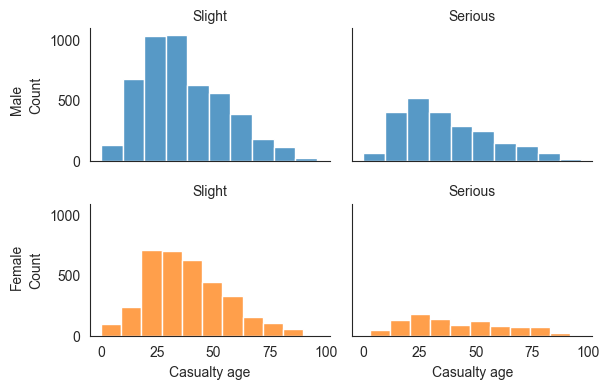

In [6]:
sns.set_style('white')
g = sns.FacetGrid(train, col='casualty_severity', row='sex_of_casualty', sharey=True, hue='sex_of_casualty', height=2, aspect=1.5)
g.map(sns.histplot, 'age_of_casualty', bins=10)
g.set_titles('{col_name}', '{row_name}')
g.set_xlabels(label = 'Casualty age')
labels = ['Male', 'Female']
for ind,ax in enumerate(g.axes):
  ax[0].annotate(labels[ind], (-80, 50), xycoords = 'axes pixels', rotation=90)

In [7]:
train['age_band_of_casualty'] = pd.Categorical(train['age_band_of_casualty'], ordered=True, categories=['0 - 5', '6 - 10', '11 - 15', '16 - 20', '21 - 25', '26 - 35', '36 - 45', '46 - 55', '56 - 65', '66 - 75', 'Over 75'])

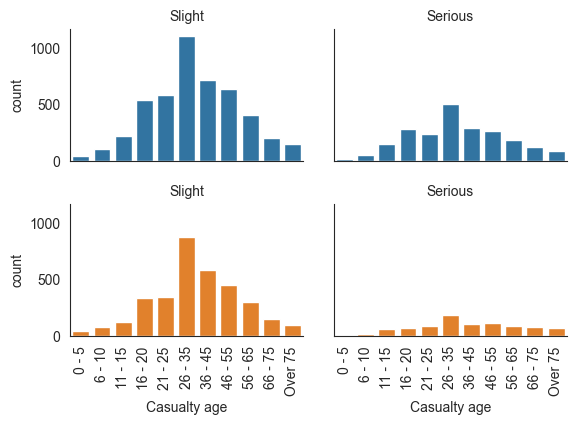

In [8]:
sns.set_style('white')
g = sns.FacetGrid(train, col='casualty_severity', row='sex_of_casualty', sharey=True, hue='sex_of_casualty', height=2, aspect=1.5)
g.map(sns.countplot, 'age_band_of_casualty', order=train.age_band_of_casualty.cat.categories)
g.set_titles('{col_name}', '{row_name}')
g.set_xlabels(label = 'Casualty age')
labels = ['Male', 'Female']
for axes in g.axes.flat:
    for label in axes.get_xticklabels():
        label.set_rotation(90)

The Casualty_class and casualty_type does seem to have a lot of information overlap. 'Driver or rider' should be de-aggregated if possible, as we can fairly safely assume that motorcyclists or cyclists are going to fare worse than car drives.

In [9]:
table = pd.pivot_table(train, index=['casualty_class'], columns='casualty_severity', values='accident_index', aggfunc=len)
table / train.shape[0]*100

casualty_severity,Serious,Slight
casualty_class,,
Driver or rider,18.839687,52.196496
Passenger,3.239722,10.608328
Pedestrian,5.968835,9.146932


There area a tonne of casualty types that I think we could combine. Some of these categories make up for such a small proportion of the data.

In [10]:
table = pd.pivot_table(train, index=['casualty_type'], columns='casualty_severity', values='accident_index', aggfunc=len)
print(np.round(table / train.shape[0]*100, 2))
print(train['casualty_type'].value_counts(normalize=True))

casualty_severity                                   Serious  Slight
casualty_type                                                      
Agricultural vehicle occupant                          0.04    0.10
Bus or coach occupant (17 or more pass seats)          0.34    1.29
Car occupant                                          13.68   48.96
Cyclist                                                2.88    5.44
Electric motorcycle rider or passenger                 0.11    0.04
Goods vehicle (7.5 tonnes mgw and over) occupant       0.10    0.28
Goods vehicle (over 3.5t. and under 7.5t.) occu...     0.04    0.07
Goods vehicle (unknown weight) occupant                0.12    0.31
Horse rider                                            0.02    0.06
Minibus (8 - 16 passenger seats) occupant              0.01    0.15
Mobility scooter rider                                 0.10    0.20
Motorcycle - unknown cc rider or passenger             0.63    0.48
Motorcycle 125cc and under rider or passenger   

Interesting that most serious collisions have 1 casualty - I wonder if this is due to a vehicle hitting a cyclist / motorcyclist / pedestrian. Can we emphasise this somehow?

In [11]:
table = pd.pivot_table(train, index=['number_of_casualties'], columns='casualty_severity', values='accident_index', aggfunc=len)
np.round(table / train.shape[0]*100, 2)

casualty_severity,Serious,Slight
number_of_casualties,,
1,17.90,40.56
2,5.70,18.14
3,2.11,7.26
4,1.30,2.96
5,0.75,1.50
6,0.16,0.79
7,0.12,0.18
8,NaN,0.14
9,NaN,0.16


Multi-vehicle collisions (3+) seem to make up a small amount of the data. Let's consider combining these multi-vehicle incidents into one category. We should likely do this for high casualty incidents too.

In [12]:
table = pd.pivot_table(train, index=['number_of_vehicles'], columns='casualty_severity', values='accident_index', aggfunc=len)
np.round(table / train.shape[0]*100, 2)

casualty_severity,Serious,Slight
number_of_vehicles,,
1,9.66,14.52
2,15.05,47.35
3,2.30,7.47
4,0.71,1.76
5,0.22,0.46
6,0.11,0.27
7,0.01,0.06
8,NaN,0.07


We have a couple of features about pedestrians that are dominated (>80%) by not being an entry containing a pedestrian. 

In [13]:
train.pedestrian_location.value_counts(normalize=True)

pedestrian_location
Not a Pedestrian                                                           0.848842
In carriageway, crossing elsewhere                                         0.063650
In carriageway, not crossing                                               0.019280
Crossing on pedestrian crossing facility                                   0.018664
Unknown or other                                                           0.018488
On footway or verge                                                        0.015582
In centre of carriageway - not on refuge, island or central reservation    0.009772
Crossing elsewhere within 50m. of pedestrian crossing                      0.004226
On refuge, central island or central reservation                           0.001321
Crossing in zig-zag approach lines                                         0.000176
Name: proportion, dtype: float64

In [14]:
train.pedestrian_movement.value_counts(normalize=True)

pedestrian_movement
Not a Pedestrian                                                                                             0.848842
Unknown or other                                                                                             0.070165
Crossing from driver's nearside                                                                              0.037151
Crossing from driver's offside                                                                               0.019984
In carriageway, stationary - not crossing  (standing or playing)                                             0.010564
Walking along in carriageway, facing traffic                                                                 0.003433
Crossing from nearside - masked by parked or stationary vehicle                                              0.003169
Walking along in carriageway, back to traffic                                                                0.002641
Crossing from offside - masked by  p

Maybe car_passenger can be combined with the casualty_type data.

In [15]:
train.car_passenger.value_counts(normalize=True)

car_passenger
Not car passenger       0.886170
Front seat passenger    0.077472
Rear seat passenger     0.036359
Name: proportion, dtype: float64

bus_or_coach_passenger is unlikely to give us much information gain, we can probably drop this.

In [16]:
train.bus_or_coach_passenger.value_counts(normalize=True)

bus_or_coach_passenger
Not a bus or coach passenger    0.988115
Seated passenger                0.007395
Standing passenger              0.002641
Boarding                        0.000968
Alighting                       0.000880
Name: proportion, dtype: float64

Same again.

In [17]:
train.pedestrian_road_maintenance_worker.value_counts(normalize=True)

pedestrian_road_maintenance_worker
No / Not applicable    0.987323
Not Known              0.011973
Yes                    0.000704
Name: proportion, dtype: float64

* Casualty_type and casualty_class could be combined for more granular information abou the casualties.

* The most fatal accidents occur (almost twice that of other categories) when there is a single car and a single casualty. Is this when a car is hitting a pedestrian/cyclist? Is it the driver of a single occupancy vehicle hitting a stationary object? We could potentially engineer a feature to encapsulate the nature of these single casualty/single vehicle incidents.

* The most serious injuries occur when 2 vehicles are involved, likely because this is just the most common type of collision.

* Age and gender of the casualties are clearly quite relevant to the frequency/outcome of crashes. Age_band is probably preferable to the continuous age feature.


### When do the most severe accidents occur?

Fridays are a bad day to be on the road! Fewer collisions occur on sunday, as you might expect. Could reduce to weekday versus weekend (friday evenings counted as weekend?)

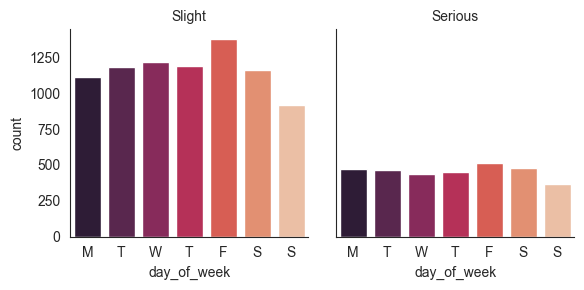

In [18]:
g = sns.FacetGrid(train, col='casualty_severity', sharey=True)
g.map(sns.countplot, 'day_of_week', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='rocket', data=train)
g.set_xticklabels(['M', 'T', 'W', 'T', 'F', 'S', 'S'])
g.set_titles('{col_name}')


## Need to convert some stuff ot look at time of day

Rush hours clearly have a notable impact on the number of collisions. Maybe engineer a rush hour feature? Also a daytime vs. nighttime?


In [ ]:
train['time'] = pd.to_datetime(train['time'], format='%H:%M').dt.hour

c:\Users\Elena\.conda\envs\DfT_project_env\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


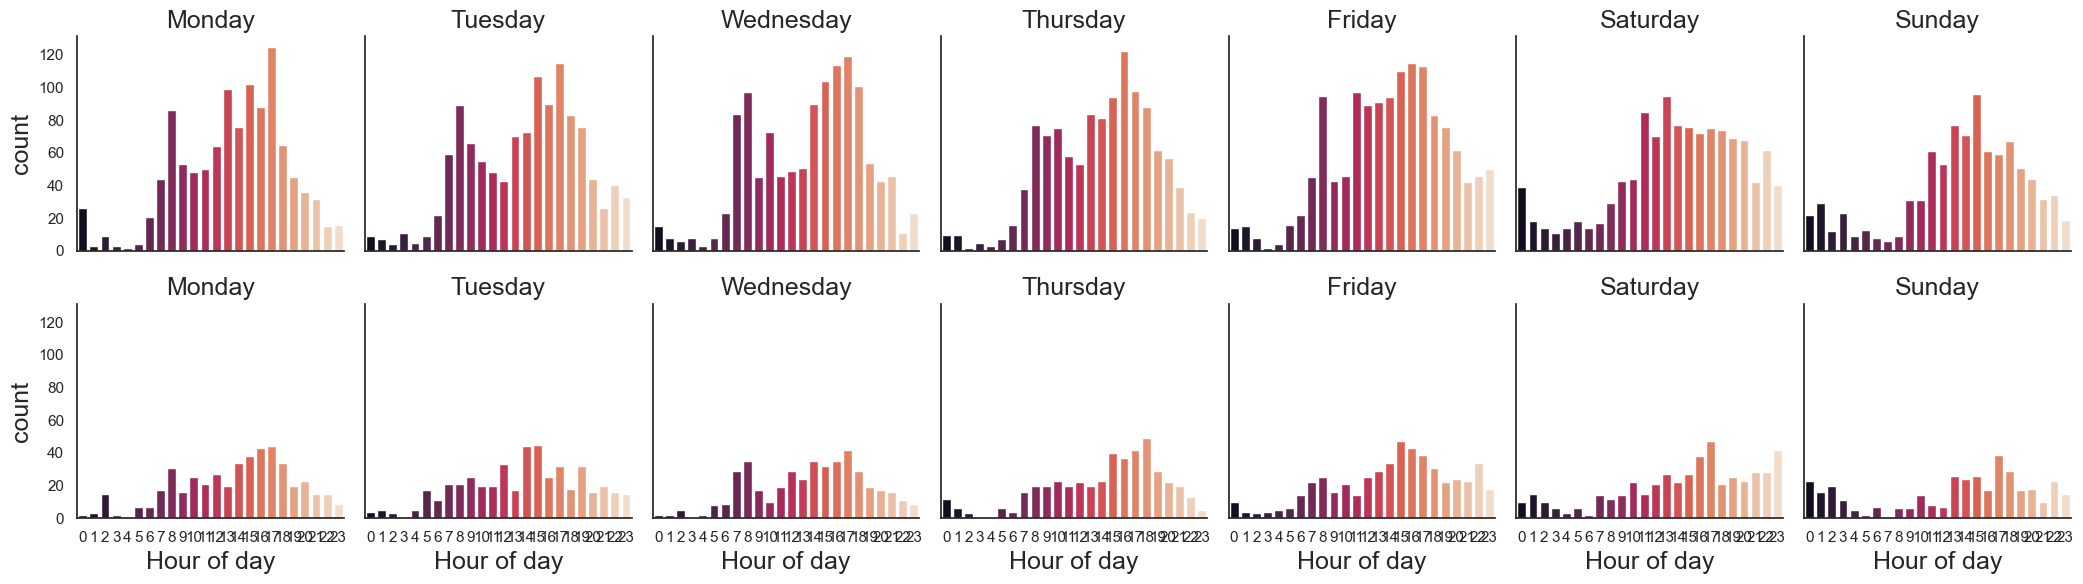

In [ ]:

g = sns.FacetGrid(train, row='casualty_severity', col='day_of_week', col_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], sharey=True)
g.map(sns.countplot, 'time', palette='rocket')
g.set_titles('{col_name}')
g.set_xlabels('Hour of day')

COVID atleast reduced the number of road traffic collisions!

<Axes: xlabel='accident_year', ylabel='month'>

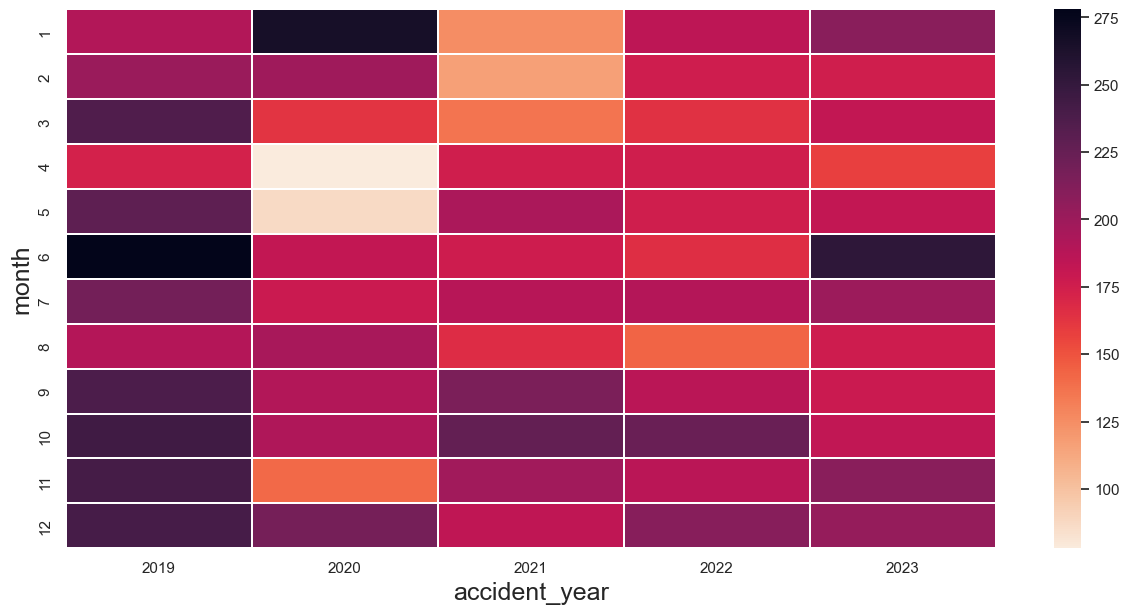

In [20]:
train['month'] = pd.to_datetime(train.date, format ='%d/%m/%Y').dt.month

table = pd.pivot_table(train, values='accident_index', index='month', columns='accident_year', aggfunc=len)
plt.figure(figsize=(15,7))
sns.set(rc={"axes.labelsize":18},font_scale=1)
sns.heatmap(table,linewidths=.1,annot=False,cmap='rocket_r')

### Where do the accidents occur, and where are they most severe?

In [21]:
district_data = train.groupby(['local_authority_district', 'casualty_severity']).size().reset_index().pivot(columns='casualty_severity', index='local_authority_district', values=0) / train.shape[0]*100
np.round(district_data, 1)

casualty_severity,Serious,Slight
local_authority_district,,
Barnsley,4.9,12.2
Doncaster,7.4,20.3
Rotherham,5.3,13.3
Sheffield,10.4,26.2


Sheffield has the most collisions, presumably due to a greater volume of traffic. The trend of Sheffield > Doncaster > Rotherham > Barnsley holds true for both serious and slight incidents. Doesn't seem to be much info here.

c:\Users\Elena\.conda\envs\DfT_project_env\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


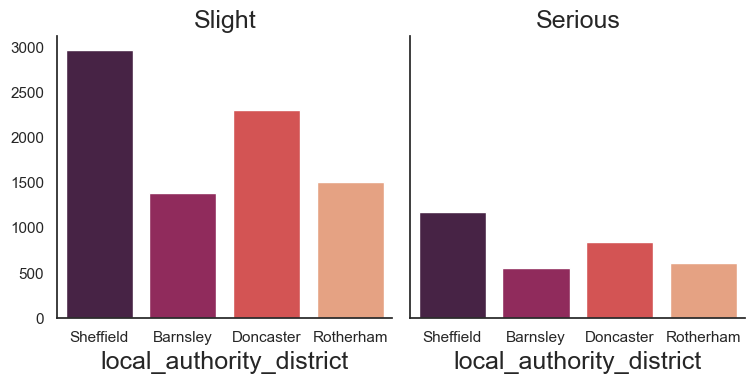

In [22]:
sns.set_style('white')
g = sns.FacetGrid(train, col='casualty_severity', sharey=True, height=4, aspect=1)
g.map(sns.countplot, 'local_authority_district', palette='rocket', hue='local_authority_district', data=train)
g.set_titles('{col_name}')
g.set_ylabels('')
labels = ['Doncaster', 'Sheffield', 'Rotherham', 'Barnsley']

Local_authority_highway is duplicated information in local_authority_district, so we can drop.

In [23]:
district_data = train.groupby(['local_authority_highway', 'casualty_severity']).size().reset_index().pivot(columns='casualty_severity', index='local_authority_highway', values=0) / train.shape[0]*100
np.round(district_data, 1)

casualty_severity,Serious,Slight
local_authority_highway,,
E08000016,4.9,12.2
E08000017,7.4,20.3
E08000018,5.3,13.3
E08000019,10.4,26.2


c:\Users\Elena\.conda\envs\DfT_project_env\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


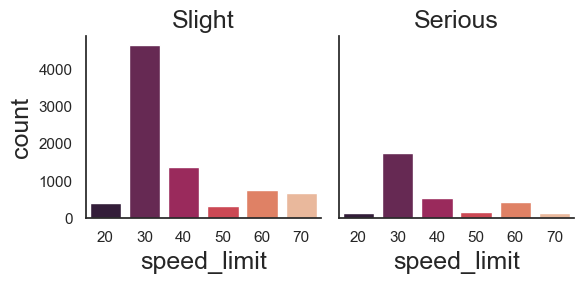

In [24]:
sns.set_style('white')
g = sns.FacetGrid(train, col='casualty_severity', sharey=True)
g.map(sns.countplot, 'speed_limit', palette='rocket')
g.set_titles('{col_name}')

In [25]:
np.round(train.groupby(['urban_or_rural_area', 'casualty_severity']).size().reset_index().pivot(columns='casualty_severity', index='urban_or_rural_area', values=0) / train.shape[0]*100, 2)


casualty_severity,Serious,Slight
urban_or_rural_area,,
Rural,9.22,21.74
Urban,18.83,50.22


In [26]:
train.trunk_road_flag.value_counts(normalize=True)

trunk_road_flag
Non-trunk                                    0.920063
Trunk (Roads managed by Highways England)    0.079937
Name: proportion, dtype: float64

In [27]:
train.first_road_class.value_counts(normalize=True)

first_road_class
Unclassified    0.432873
A               0.367990
B               0.127828
Motorway        0.051149
A(M)            0.014438
C               0.005722
Name: proportion, dtype: float64

In [28]:
train.second_road_class.value_counts(normalize=True)


second_road_class
Not at junction or within 20 metres    0.472753
Unclassified                           0.388679
A                                      0.086627
B                                      0.044546
C                                      0.004666
Motorway                               0.002025
A(M)                                   0.000704
Name: proportion, dtype: float64

In [29]:
train.road_type.value_counts(normalize=True)


road_type
Single carriageway    0.741086
Dual carriageway      0.190862
Roundabout            0.046747
Slip road             0.017607
One way street        0.003698
Name: proportion, dtype: float64

In [30]:
train.junction_detail.value_counts(normalize=True)


junction_detail
Not at junction or within 20 metres    0.472841
T or staggered junction                0.227661
Crossroads                             0.114799
Other junction                         0.085835
Roundabout                             0.060217
More than 4 arms (not roundabout)      0.016111
Private drive or entrance              0.008628
Slip road                              0.007659
Mini-roundabout                        0.006251
Name: proportion, dtype: float64

* Over 90 % of the trunk road flag information is unclassified, so we can likely drop this column.
* Road_type and junction_detail contain very similar information. Speed_limit likely encapsulates similar data as the road_type, seeing as the road type determines the speed limit of a road. This also applies to the *road_class columns (first_ and second_). Junction_detail might be interesting, but we likely want to reduce the number of categories as some are quite infrequent.

### What are the road conditions when crashes occur?

In [31]:
print(train.light_conditions.value_counts(dropna=False))
np.round(train.groupby(['light_conditions', 'casualty_severity']).size().reset_index().pivot(columns='casualty_severity', index='light_conditions', values=0) / train.shape[0]*100, 2)


light_conditions
Daylight                       7773
Darkness - lights lit          2697
Darkness - no lighting          605
Darkness - lighting unknown     178
Darkness - lights unlit         106
Name: count, dtype: int64


casualty_severity,Serious,Slight
light_conditions,,
Darkness - lighting unknown,0.55,1.01
Darkness - lights lit,7.32,16.42
Darkness - lights unlit,0.19,0.74
Darkness - no lighting,1.99,3.34
Daylight,17.99,50.44


In [32]:
print(train.weather_conditions.value_counts(dropna=False))
np.round(train.groupby(['weather_conditions', 'casualty_severity']).size().reset_index().pivot(columns='casualty_severity', index='weather_conditions', values=0) / train.shape[0]*100, 2)

weather_conditions
Fine no high winds       8964
Raining no high winds    1501
Other                     388
Fine + high winds         211
Raining + high winds      163
Snowing no high winds      69
Fog or mist                51
Snowing + high winds       12
Name: count, dtype: int64


casualty_severity,Serious,Slight
weather_conditions,,
Fine + high winds,0.49,1.36
Fine no high winds,21.75,57.16
Fog or mist,0.13,0.32
Other,1.05,2.37
Raining + high winds,0.51,0.92
Raining no high winds,3.87,9.34
Snowing + high winds,0.05,0.05
Snowing no high winds,0.18,0.42


In [33]:
print(train.road_surface_conditions.value_counts(dropna=False))
np.round(train.groupby(['road_surface_conditions', 'casualty_severity']).size().reset_index().pivot(columns='casualty_severity', index='road_surface_conditions', values=0) / train.shape[0]*100, 2)

road_surface_conditions
Dry                     7829
Wet or damp             3373
Frost or ice             106
Snow                      44
Flood over 3cm. deep       7
Name: count, dtype: int64


casualty_severity,Serious,Slight
road_surface_conditions,,
Dry,19.10,49.82
Flood over 3cm. deep,0.02,0.04
Frost or ice,0.33,0.61
Snow,0.11,0.28
Wet or damp,8.50,21.20


In [34]:
train.pedestrian_crossing_human_control.value_counts(normalize=True)

pedestrian_crossing_human_control
None within 50 metres                 0.981424
Control by other authorised person    0.013558
Control by school crossing patrol     0.004842
unknown (self reported)               0.000176
Name: proportion, dtype: float64

In [35]:
train.pedestrian_crossing_physical_facilities.value_counts(normalize=True)

pedestrian_crossing_physical_facilities
No physical crossing facilities within 50 metres                             0.856325
Pedestrian phase at traffic signal junction                                  0.045691
Pelican, puffin, toucan or similar non-junction pedestrian light crossing    0.042962
Zebra                                                                        0.030020
Central refuge                                                               0.023682
Footbridge or subway                                                         0.001144
unknown (self reported)                                                      0.000176
Name: proportion, dtype: float64

* A lot of crashes are hapenning in dry, light conditions with no crazy weather.
* A good amount of crashes are happening in dark conditions. In fact, although less than half of the total crashes are hapenning in dark conditions, an almost equivalent proportion of the crashes are fatal in the dark as during daylight (0.79 vs 0.83 %).
* We should do some feature engineering to combine some of these categories (i.e. weather_conditions into weather and high_winds as a bool value, lighting into daylight, dark+lights, or dark no lights, and road_surface_conditions into dry, wet, or freezing.

### Actions

Great stuff! There are some interesting patterns in the data and a lot of complexity that hopefully a model can begin to unpick. Before we jump into training the model, we want to prune and prepare the data a little bit more, based upon our EDA.

Our next steps:

* Drop columns which are unlikely to hold much / any predictive power, either due to irrelevance or because the information is already encapsulated within other features.

* Some features don't contain a huge amount of information (e.g. pedestrian_location), so we should further investigate their correlation with our target variable (casualty_severity) and consider whether to include these in our model.

* We can combine some columns which contain similar information, e.g. casualty_type and casualty_class columns can be combined to provide more granularity about the casualties.

* We will need to convert all categorical data into numerical values, which is required by most models. We have a few features which can be mapped to boolean values, whilst others with multiple categories can be one-hot encoded. We may want to look into reducing the number of categories for certain features.

